# Link To Github Repository: https://github.com/taqi112/DSCI510_final_project

In [263]:
#import necessary libraries
# from email import header
# from xml.dom import WRONG_DOCUMENT_ERR
from bs4 import BeautifulSoup
import requests
import pandas as pd
import string
import json
import random
import time

from fake_useragent import UserAgent
#importing ML models from scikit-learn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np


# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

import os

In [264]:
import session_info

session_info.show()

# Fantasy Points Scoring Metric

In [265]:

'''
point = +1 pts

made 3pt shot = +0.5 pts

Rebound = + 1.25 pts

Assist = +1.5 pts

Steal = +2 pts

Block = +2 pts

Turnover = -.5 pts

Double-Double = +1.5 pts

Triple-Double = +3 pts


'''

'\npoint = +1 pts\n\nmade 3pt shot = +0.5 pts\n\nRebound = + 1.25 pts\n\nAssist = +1.5 pts\n\nSteal = +2 pts\n\nBlock = +2 pts\n\nTurnover = -.5 pts\n\nDouble-Double = +1.5 pts\n\nTriple-Double = +3 pts\n\n\n'

In [266]:
### Collect Random User Agents

user_agent_ls = []
ua = UserAgent()
for i in range(3000):
    user_agent_ls.append(ua.random)

In [267]:
len(user_agent_ls)

3000

In [268]:
# GET URL'S FOR OCT TO JUNE GAMES FOR 2021 - 2022 SEASON

games_url_start = 'https://www.basketball-reference.com/leagues/NBA_2022_games-{}.html'
ls_month = ['october', 'november', 'december', 'january', 'february', 'march', 'april', 'may', 'june']

url_ls = []
for month in ls_month:
    url = games_url_start.format(month)
    url_ls.append(url)
    
    

url_ls

['https://www.basketball-reference.com/leagues/NBA_2022_games-october.html',
 'https://www.basketball-reference.com/leagues/NBA_2022_games-november.html',
 'https://www.basketball-reference.com/leagues/NBA_2022_games-december.html',
 'https://www.basketball-reference.com/leagues/NBA_2022_games-january.html',
 'https://www.basketball-reference.com/leagues/NBA_2022_games-february.html',
 'https://www.basketball-reference.com/leagues/NBA_2022_games-march.html',
 'https://www.basketball-reference.com/leagues/NBA_2022_games-april.html',
 'https://www.basketball-reference.com/leagues/NBA_2022_games-may.html',
 'https://www.basketball-reference.com/leagues/NBA_2022_games-june.html']

In [269]:
# INITIALIZE lIST OF AWAY TEAM ABREVIATIONS FOR EACH GAME
away_team_abrev_ls = []

In [270]:
# LETS FIRST GET ALL THE URL ENDINGS FOR THE BOXSCORES FOR EVERY GAME OF THE SEASON 

url_endings_ls = []
for i in range(9):
    content = requests.get(url_ls[i])
    soup = BeautifulSoup(content.content, 'html.parser')
    month_schedule = soup.find(id = 'schedule')
    rows = month_schedule.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('th')
        for col in cols:
            url_endings_ls.append(col.get('csk'))
        
# And get away team abbreviations for each game of the season

        tds = row.findAll('td',{'data-stat':'visitor_team_name'})
        for td in tds:
            att = td.get('csk')
            away_abreviation = att[:3]
            away_team_abrev_ls.append(away_abreviation)

In [271]:
len(url_endings_ls)

1323

In [272]:
len(away_team_abrev_ls)

1323

In [273]:
# INITIALIZE lIST OF HOME TEAM ABREVIATIONS FOR EACH GAME
home_team_abreviation_ls = []
for i in url_endings_ls:
    last_three = i[-3:]
    home_team_abreviation_ls.append(last_three)

In [274]:
len(home_team_abreviation_ls)

1323

In [275]:
# We want boxscore stats for both teams for every game for 2021 - 2022 season 

boxscore_url_start = 'https://www.basketball-reference.com/boxscores/{}.html'
boxscore_url_ls = []
for ending in url_endings_ls:
    url = boxscore_url_start.format(ending)
    boxscore_url_ls.append(url)

len(boxscore_url_ls)

1323

In [276]:
new_uagent_ls = []
ua2 = UserAgent()
for i in range(3000):
    new_uagent_ls.append(ua2.random)

In [277]:
new_uagent_ls

['Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.13 (KHTML, like Gecko) Chrome/9.0.597.0 Safari/534.13',
 'Opera/9.02 (Windows NT 5.1; U; de)',
 'Opera/8.52 (Windows NT 5.1; U; ru)',
 'Opera/8.52 (X11; Linux i686; U; en)',
 'Mozilla/5.0 (X11; U; Linux i686; es-ES; rv:1.9.1.9) Gecko/20100317 SUSE/3.5.9-0.1 Firefox/3.5.9',
 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML like Gecko) Chrome/46.0.2486.0 Safari/537.36 Edge/13.9200',
 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; Zune 3.0)',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19577',
 'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.8810.3391 Safari/537.36 Edge/18.14383',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML like Gecko) Chrome/51.0.2704.79 Safa

# Below is the main piece of code to scrape each teams box scores and save them into a list of data frames

In [278]:
dfs = []
home_team_id_start = 'div_box-{}-game-basic'
away_team_id_start = 'div_box-{}-game-basic'
counter = 0
counter2 = 0
counter3 = 0
for boxscore in boxscore_url_ls:
    
    headers = {'User-Agent':str(random.choice(user_agent_ls))}
    
    content = requests.get(boxscore, headers=headers)
    
    
    soup = BeautifulSoup(content.content, 'html.parser')
    over_header = soup.find_all('tr', class_= 'over_header')
    for header in over_header:
            header.decompose()


    away_team_id = away_team_id_start.format(away_team_abrev_ls[counter]) 
    away_box_tbl = soup.find(id = away_team_id) 
    away_boxscore = pd.read_html(str(away_box_tbl))[0]

    away_boxscore_df = away_boxscore.drop(columns=['ORB', 'DRB'])
    away_boxscore_df = away_boxscore_df.drop([5])
    away_boxscore_df = away_boxscore_df[:-1]

    dfs.append(away_boxscore_df)
    counter2 = counter2 + 1

    home_team_id = home_team_id_start.format(home_team_abreviation_ls[counter])
    home_box_tbl = soup.find(id = home_team_id)

    home_boxscore = pd.read_html(str(home_box_tbl))[0]
    home_boxscore_df = home_boxscore.drop(columns=['ORB', 'DRB'])
    home_boxscore_df = home_boxscore_df.drop([5])
    home_boxscore_df = home_boxscore_df[:-1]

    dfs.append(home_boxscore_df)

    counter = counter + 1

    counter3 = counter3 + 1
    
    time.sleep(random.randint(1,5))
    
    
    
    

    


In [280]:
len(dfs)

2646

In [281]:
sample_data = pd.concat(dfs)

In [282]:
sample_data

Starters            MP            FG           FGA           FG%  \
0      Joe Harris         30:46             3             9          .333   
1    James Harden         30:38             6            16          .375   
2    Kevin Durant         30:15            13            25          .520   
3     Nic Claxton         24:10             6             9          .667   
4   Blake Griffin         22:59             2             5          .400   
..            ...           ...           ...           ...           ...   
11  Aaron Nesmith          1:03             0             0           NaN   
12   Nik Stauskas          1:03             0             1          .000   
13   Juwan Morgan          1:01             0             0           NaN   
14   Daniel Theis  Did Not Play  Did Not Play  Did Not Play  Did Not Play   
15    Malik Fitts  Did Not Play  Did Not Play  Did Not Play  Did Not Play   

              3P           3PA           3P%            FT           FTA  \
0              3             5          .600             0             0   
1              4             8          .500             4             4   
2              3             7          .429             3             6   
3              0             0           NaN             0             3   
4              0             1          .000             2             2   
..           ...           ...           ...           ...           ...   
11             0             0           NaN             0             0   
12             0             1          .000             0             0   
13             0             0           NaN             0             0   
14  Did Not Play  Did Not Play  Did Not Play  Did Not Play  Did Not Play   
15  Did Not Play  Did Not Play  Did Not Play  Did Not Play  Did Not Play   

             FT%           TRB           AST           STL           BLK  \
0            NaN             2             2             0             0   
1          1.000             8             8             1             2   
2           .500            11             4             0             2   
3           .000             7             0             0             0   
4          1.000             5             0             1             0   
..           ...           ...           ...           ...           ...   
11           NaN             0             0             0             0   
12           NaN             0             0             0             0   
13           NaN             0             0             0             0   
14  Did Not Play  Did Not Play  Did Not Play  Did Not Play  Did Not Play   
15  Did Not Play  Did Not Play  Did Not Play  Did Not Play  Did Not Play   

             TOV            PF           PTS           +/-  
0              2             1             9             0  
1              4             3            20           -20  
2              1             2            32           -20  
3              0             3            12           -15  
4              1             1             6            -6  
..           ...           ...           ...           ...  
11             0             1             0            -2  
12             0             0             0            -2  
13             0             0             0             0  
14  Did Not Play  Did Not Play  Did Not Play  Did Not Play  
15  Did Not Play  Did Not Play  Did Not Play  Did Not Play  

[33804 rows x 19 columns]

In [283]:
sample_data = sample_data.sort_values(by='Starters')

In [284]:
sample_data[:5]

Starters     MP FG FGA   FG% 3P 3PA    3P% FT FTA    FT% TRB AST STL  \
3  Aaron Gordon  30:02  4   5  .800  1   1  1.000  0   0    NaN   1   1   0   
1  Aaron Gordon  35:45  4   7  .571  2   4   .500  0   0    NaN   8   4   0   
3  Aaron Gordon  29:01  5   6  .833  1   1  1.000  1   2   .500   8   4   0   
4  Aaron Gordon  23:35  6   9  .667  1   2   .500  0   1   .000   5   2   1   
1  Aaron Gordon  32:05  8  12  .667  3   5   .600  4   4  1.000   9   0   0   

  BLK TOV PF PTS  +/-  
3   2   1  5   9   +5  
1   1   2  3  10  +11  
3   1   3  2  12  +22  
4   1   2  1  13  +24  
1   0   1  5  23   -5

In [285]:
sample_data.Starters.value_counts()

Kevon Looney             104
Juan Toscano-Anderson    103
Payton Pritchard         102
Grant Williams           101
Jayson Tatum             100
                        ... 
Ade Murkey                 1
D.J. Stewart Jr.           1
Ben Simmons                1
Grant Riller               1
Jason Preston              1
Name: Starters, Length: 622, dtype: int64

# START OF DATA CLEANING 

In [286]:
sample_data.drop(sample_data[sample_data.MP == 'Did Not Play'].index, inplace=True)

In [287]:
sample_data

Starters     MP FG FGA   FG% 3P 3PA    3P% FT FTA    FT% TRB AST  \
3      Aaron Gordon  30:02  4   5  .800  1   1  1.000  0   0    NaN   1   1   
1      Aaron Gordon  35:45  4   7  .571  2   4   .500  0   0    NaN   8   4   
3      Aaron Gordon  29:01  5   6  .833  1   1  1.000  1   2   .500   8   4   
4      Aaron Gordon  23:35  6   9  .667  1   2   .500  0   1   .000   5   2   
1      Aaron Gordon  32:05  8  12  .667  3   5   .600  4   4  1.000   9   0   
..              ...    ... ..  ..   ... ..  ..    ... ..  ..    ...  ..  ..   
2   Ziaire Williams  28:39  4   7  .571  1   3   .333  0   0    NaN   6   0   
6   Ziaire Williams  22:03  6  12  .500  1   6   .167  1   1  1.000   3   0   
3   Ziaire Williams  21:52  4   6  .667  2   2  1.000  0   0    NaN   1   0   
3   Ziaire Williams  30:55  6   8  .750  2   3   .667  3   4   .750   5   0   
3   Ziaire Williams  27:06  4   9  .444  1   4   .250  0   0    NaN   2   3   

   STL BLK TOV PF PTS  +/-  
3    0   2   1  5   9   +5  
1    0   1   2  3  10  +11  
3    0   1   3  2  12  +22  
4    1   1   2  1  13  +24  
1    0   0   1  5  23   -5  
..  ..  ..  .. ..  ..  ...  
2    1   0   0  0   9  +14  
6    0   1   0  2  14   +4  
3    1   0   1  4  10   +5  
3    2   1   0  4  17   +8  
3    1   0   1  4   9   +4  

[15876 rows x 19 columns]

In [288]:
data = sample_data.fillna(0)

In [289]:
data

Starters     MP FG FGA   FG% 3P 3PA    3P% FT FTA    FT% TRB AST  \
3      Aaron Gordon  30:02  4   5  .800  1   1  1.000  0   0      0   1   1   
1      Aaron Gordon  35:45  4   7  .571  2   4   .500  0   0      0   8   4   
3      Aaron Gordon  29:01  5   6  .833  1   1  1.000  1   2   .500   8   4   
4      Aaron Gordon  23:35  6   9  .667  1   2   .500  0   1   .000   5   2   
1      Aaron Gordon  32:05  8  12  .667  3   5   .600  4   4  1.000   9   0   
..              ...    ... ..  ..   ... ..  ..    ... ..  ..    ...  ..  ..   
2   Ziaire Williams  28:39  4   7  .571  1   3   .333  0   0      0   6   0   
6   Ziaire Williams  22:03  6  12  .500  1   6   .167  1   1  1.000   3   0   
3   Ziaire Williams  21:52  4   6  .667  2   2  1.000  0   0      0   1   0   
3   Ziaire Williams  30:55  6   8  .750  2   3   .667  3   4   .750   5   0   
3   Ziaire Williams  27:06  4   9  .444  1   4   .250  0   0      0   2   3   

   STL BLK TOV PF PTS  +/-  
3    0   2   1  5   9   +5  
1    0   1   2  3  10  +11  
3    0   1   3  2  12  +22  
4    1   1   2  1  13  +24  
1    0   0   1  5  23   -5  
..  ..  ..  .. ..  ..  ...  
2    1   0   0  0   9  +14  
6    0   1   0  2  14   +4  
3    1   0   1  4  10   +5  
3    2   1   0  4  17   +8  
3    1   0   1  4   9   +4  

[15876 rows x 19 columns]

In [290]:
stats = ['PTS', 'TRB', 'AST', 'BLK', 'STL']
data['FG'] = data['FG'].astype('float')
data['FGA'] = data['FGA'].astype('float')
data['FG%'] = data['FG%'].astype('float')
data['3P'] = data['3P'].astype('float')
data['3PA'] = data['3PA'].astype('float')
data['3P%'] = data['3P%'].astype('float')
data['FT'] = data['FT'].astype('float')
data['FTA'] = data['FTA'].astype('float')
data['FT%'] = data['FT%'].astype('float')
data['TRB'] = data['TRB'].astype('float')
data['AST'] = data['AST'].astype('float')
data['STL'] = data['STL'].astype('float')
data['BLK'] = data['BLK'].astype('float')
data['TOV'] = data['TOV'].astype('float')
data['PF'] = data['PF'].astype('float')
data['PTS'] = data['PTS'].astype('float')
data['+/-'] = data['+/-'].astype('float')


data['TRPL_DBL'] = (data[stats] >= 10).sum(1) >= 3
data['DBL_DBL'] = (data[stats] >= 10).sum(1) == 2

In [291]:
data[:5]

Starters     MP   FG   FGA    FG%   3P  3PA  3P%   FT  FTA  FT%  TRB  \
3  Aaron Gordon  30:02  4.0   5.0  0.800  1.0  1.0  1.0  0.0  0.0  0.0  1.0   
1  Aaron Gordon  35:45  4.0   7.0  0.571  2.0  4.0  0.5  0.0  0.0  0.0  8.0   
3  Aaron Gordon  29:01  5.0   6.0  0.833  1.0  1.0  1.0  1.0  2.0  0.5  8.0   
4  Aaron Gordon  23:35  6.0   9.0  0.667  1.0  2.0  0.5  0.0  1.0  0.0  5.0   
1  Aaron Gordon  32:05  8.0  12.0  0.667  3.0  5.0  0.6  4.0  4.0  1.0  9.0   

   AST  STL  BLK  TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  
3  1.0  0.0  2.0  1.0  5.0   9.0   5.0     False    False  
1  4.0  0.0  1.0  2.0  3.0  10.0  11.0     False    False  
3  4.0  0.0  1.0  3.0  2.0  12.0  22.0     False    False  
4  2.0  1.0  1.0  2.0  1.0  13.0  24.0     False    False  
1  0.0  0.0  0.0  1.0  5.0  23.0  -5.0     False    False

In [292]:
data['Fantasy_PTS'] = data['PTS']*1 + data['3P']*.5 + data['TRB']*1.25 + data['AST']*1.5 + data['STL']*2 + data['BLK']*2 - data['TOV']*.5
data['Fantasy_PTS'] = np.where(data['TRPL_DBL'] == True, data['Fantasy_PTS']+3, data['Fantasy_PTS'])
data['Fantasy_PTS'] = np.where(data['DBL_DBL'] == True, data['Fantasy_PTS']+1.5, data['Fantasy_PTS'])

In [293]:
### CONVERT MINUTES PLAYED TO AN INTEGER OF JUST MINUTES NOT THE SECONDS 

In [294]:
data['MP'] = data['MP'].str[0:2]
data['MP'] = data['MP'].str.rstrip(':')

In [295]:
data[:5]

Starters  MP   FG   FGA    FG%   3P  3PA  3P%   FT  FTA  FT%  TRB  AST  \
3  Aaron Gordon  30  4.0   5.0  0.800  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
1  Aaron Gordon  35  4.0   7.0  0.571  2.0  4.0  0.5  0.0  0.0  0.0  8.0  4.0   
3  Aaron Gordon  29  5.0   6.0  0.833  1.0  1.0  1.0  1.0  2.0  0.5  8.0  4.0   
4  Aaron Gordon  23  6.0   9.0  0.667  1.0  2.0  0.5  0.0  1.0  0.0  5.0  2.0   
1  Aaron Gordon  32  8.0  12.0  0.667  3.0  5.0  0.6  4.0  4.0  1.0  9.0  0.0   

   STL  BLK  TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  Fantasy_PTS  
3  0.0  2.0  1.0  5.0   9.0   5.0     False    False        15.75  
1  0.0  1.0  2.0  3.0  10.0  11.0     False    False        28.00  
3  0.0  1.0  3.0  2.0  12.0  22.0     False    False        29.00  
4  1.0  1.0  2.0  1.0  13.0  24.0     False    False        25.75  
1  0.0  0.0  1.0  5.0  23.0  -5.0     False    False        35.25

In [296]:
data['MP'] = data['MP'].astype('int')

In [297]:
data.dtypes

Starters        object
MP               int32
FG             float64
FGA            float64
FG%            float64
3P             float64
3PA            float64
3P%            float64
FT             float64
FTA            float64
FT%            float64
TRB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
PF             float64
PTS            float64
+/-            float64
TRPL_DBL          bool
DBL_DBL           bool
Fantasy_PTS    float64
dtype: object

# The above output shows first 5 rows of the dataset for the 2021-2022 season

In [298]:
### CONVERT DATA TO CSV 
data.to_csv("2022.csv")

# To Test my code, I recommend using data = pd.read_csv("2022.csv") to Read the csv into pandas. 

# Once the above is done ^ all of my analysis and visualization below should work and can be executed for this specific pandas dataframe. Until I scrape data again for the 2022-2023 season. That data will be in another csv file which is explained down below.

# DATA ANALYSIS AND PREPROCESSING

In [299]:
data.shape

(15876, 22)

In [300]:
np.around(data.describe(),2)

MP        FG       FGA       FG%        3P       3PA       3P%  \
count  15876.00  15876.00  15876.00  15876.00  15876.00  15876.00  15876.00   
mean      29.59      5.35     11.43      0.47      1.62      4.48      0.30   
std        6.78      3.16      5.68      0.19      1.65      3.22      0.27   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%       25.00      3.00      7.00      0.36      0.00      2.00      0.00   
50%       30.00      5.00     11.00      0.47      1.00      4.00      0.29   
75%       34.00      7.00     15.00      0.57      3.00      6.00      0.50   
max       56.00     22.00     37.00      1.00     11.00     20.00      1.00   

             FT       FTA       FT%       TRB       AST       STL       BLK  \
count  15876.00  15876.00  15876.00  15876.00  15876.00  15876.00  15876.00   
mean       2.28      2.91      0.54      5.50      3.26      0.94      0.57   
std        2.61      3.12      0.42      3.61      2.84      1.04      0.89   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      3.00      1.00      0.00      0.00   
50%        2.00      2.00      0.67      5.00      3.00      1.00      0.00   
75%        3.00      4.00      1.00      7.00      5.00      1.00      1.00   
max       23.00     27.00      1.00     25.00     19.00      8.00      8.00   

            TOV        PF       PTS       +/-  Fantasy_PTS  
count  15876.00  15876.00  15876.00  15876.00     15876.00  
mean       1.67      2.31     14.61      0.35        29.59  
std        1.55      1.45      8.56     13.15        13.71  
min        0.00      0.00      0.00    -56.00        -0.50  
25%        1.00      1.00      8.00     -9.00        19.75  
50%        1.00      2.00     13.00      0.00        28.00  
75%        2.00      3.00     20.00      9.00        38.00  
max       10.00      6.00     60.00     52.00        93.50

In [301]:
data['Fantasy_PTS'].describe()

count    15876.000000
mean        29.587365
std         13.709445
min         -0.500000
25%         19.750000
50%         28.000000
75%         38.000000
max         93.500000
Name: Fantasy_PTS, dtype: float64

In [302]:
data.isna().sum()

Starters       0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
FT             0
FTA            0
FT%            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
+/-            0
TRPL_DBL       0
DBL_DBL        0
Fantasy_PTS    0
dtype: int64

# There are no missing values in the data set

In [303]:
data.dtypes

Starters        object
MP               int32
FG             float64
FGA            float64
FG%            float64
3P             float64
3PA            float64
3P%            float64
FT             float64
FTA            float64
FT%            float64
TRB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
PF             float64
PTS            float64
+/-            float64
TRPL_DBL          bool
DBL_DBL           bool
Fantasy_PTS    float64
dtype: object

# Plot the distributions for features and variables 

<Figure size 432x288 with 0 Axes>

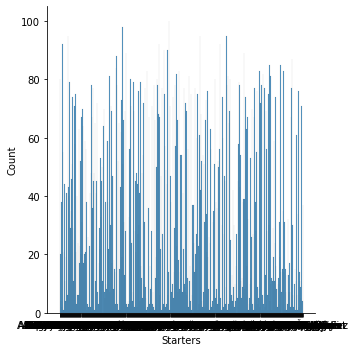

<Figure size 432x288 with 0 Axes>

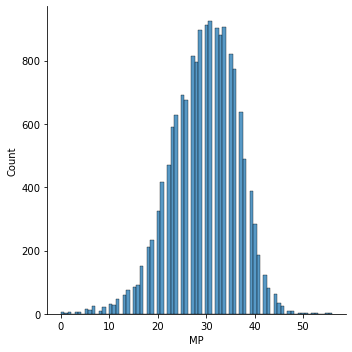

<Figure size 432x288 with 0 Axes>

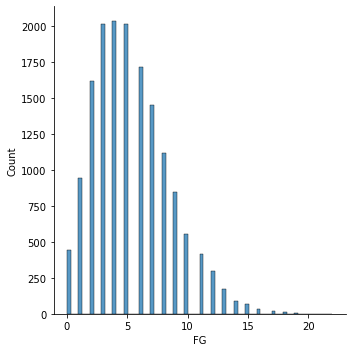

<Figure size 432x288 with 0 Axes>

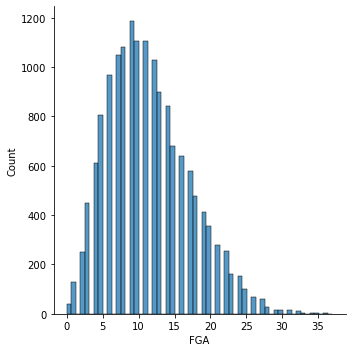

<Figure size 432x288 with 0 Axes>

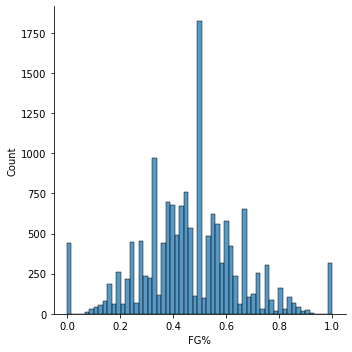

<Figure size 432x288 with 0 Axes>

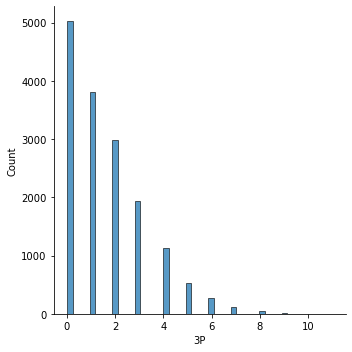

<Figure size 432x288 with 0 Axes>

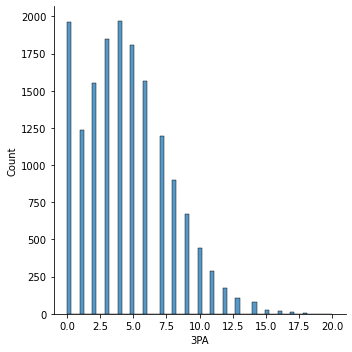

<Figure size 432x288 with 0 Axes>

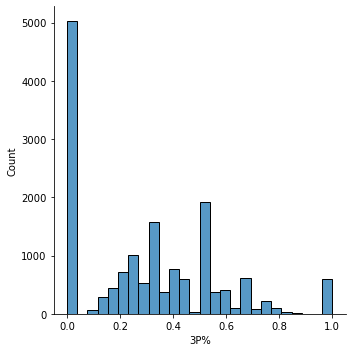

<Figure size 432x288 with 0 Axes>

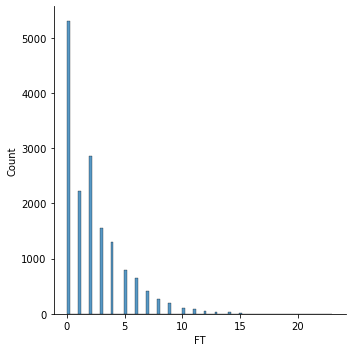

<Figure size 432x288 with 0 Axes>

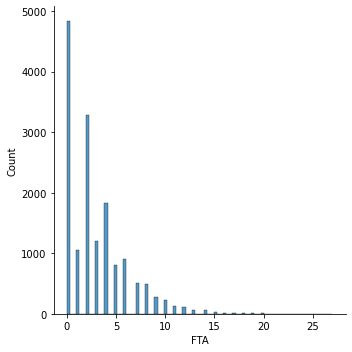

<Figure size 432x288 with 0 Axes>

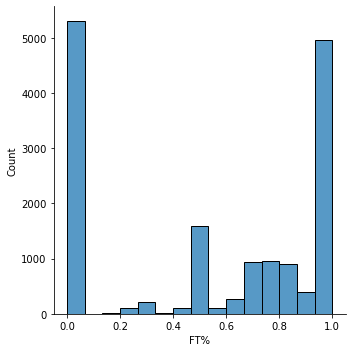

<Figure size 432x288 with 0 Axes>

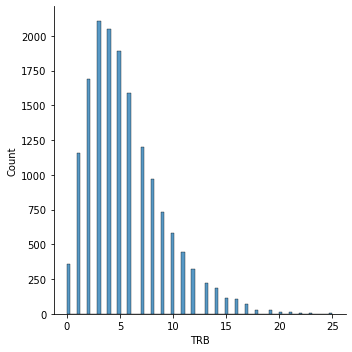

<Figure size 432x288 with 0 Axes>

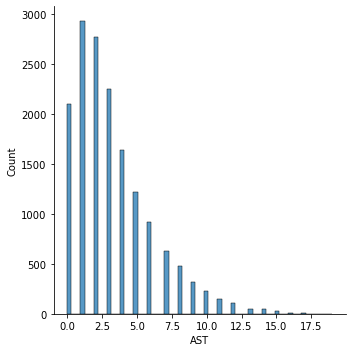

<Figure size 432x288 with 0 Axes>

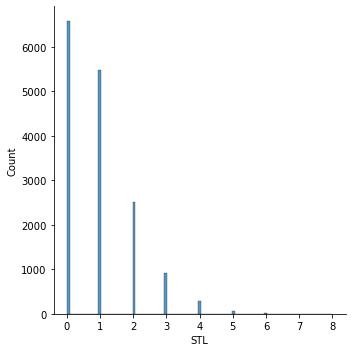

<Figure size 432x288 with 0 Axes>

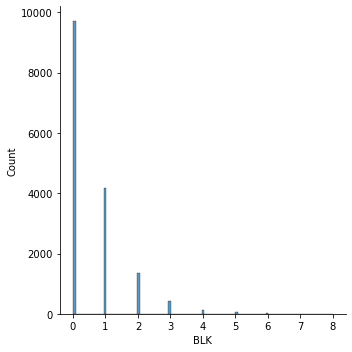

<Figure size 432x288 with 0 Axes>

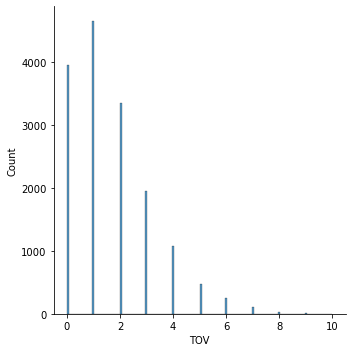

<Figure size 432x288 with 0 Axes>

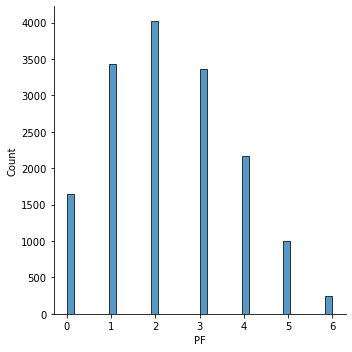

<Figure size 432x288 with 0 Axes>

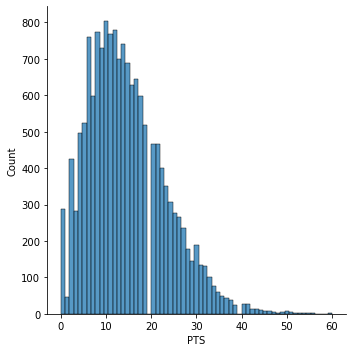

<Figure size 432x288 with 0 Axes>

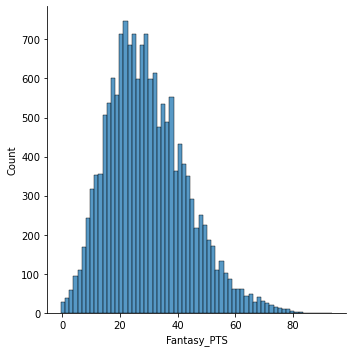

In [304]:
column_distribution_ls = []
for i in data.columns:
    if (i=='+/-' or i=='TRPL_DBL' or i=='DBL_DBL'):
        pass
    else:
        column_distribution_ls.append(i)
        
        
        
for i in column_distribution_ls:
    plt.figure()
    sns.displot(data[i])
    plt.savefig(i)
    plt.show()

# Split data into train and test sets

In [305]:
### Dropping Fantasy Points and Starters from Predictors dataframe

X = data.drop(columns=['Fantasy_PTS','Starters'], axis=1)
y = data.Fantasy_PTS

In [306]:
X

MP   FG   FGA    FG%   3P  3PA    3P%   FT  FTA   FT%  TRB  AST  STL  BLK  \
3   30  4.0   5.0  0.800  1.0  1.0  1.000  0.0  0.0  0.00  1.0  1.0  0.0  2.0   
1   35  4.0   7.0  0.571  2.0  4.0  0.500  0.0  0.0  0.00  8.0  4.0  0.0  1.0   
3   29  5.0   6.0  0.833  1.0  1.0  1.000  1.0  2.0  0.50  8.0  4.0  0.0  1.0   
4   23  6.0   9.0  0.667  1.0  2.0  0.500  0.0  1.0  0.00  5.0  2.0  1.0  1.0   
1   32  8.0  12.0  0.667  3.0  5.0  0.600  4.0  4.0  1.00  9.0  0.0  0.0  0.0   
..  ..  ...   ...    ...  ...  ...    ...  ...  ...   ...  ...  ...  ...  ...   
2   28  4.0   7.0  0.571  1.0  3.0  0.333  0.0  0.0  0.00  6.0  0.0  1.0  0.0   
6   22  6.0  12.0  0.500  1.0  6.0  0.167  1.0  1.0  1.00  3.0  0.0  0.0  1.0   
3   21  4.0   6.0  0.667  2.0  2.0  1.000  0.0  0.0  0.00  1.0  0.0  1.0  0.0   
3   30  6.0   8.0  0.750  2.0  3.0  0.667  3.0  4.0  0.75  5.0  0.0  2.0  1.0   
3   27  4.0   9.0  0.444  1.0  4.0  0.250  0.0  0.0  0.00  2.0  3.0  1.0  0.0   

    TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  
3   1.0  5.0   9.0   5.0     False    False  
1   2.0  3.0  10.0  11.0     False    False  
3   3.0  2.0  12.0  22.0     False    False  
4   2.0  1.0  13.0  24.0     False    False  
1   1.0  5.0  23.0  -5.0     False    False  
..  ...  ...   ...   ...       ...      ...  
2   0.0  0.0   9.0  14.0     False    False  
6   0.0  2.0  14.0   4.0     False    False  
3   1.0  4.0  10.0   5.0     False    False  
3   0.0  4.0  17.0   8.0     False    False  
3   1.0  4.0   9.0   4.0     False    False  

[15876 rows x 20 columns]

In [307]:
y

3    15.75
1    28.00
3    29.00
4    25.75
1    35.25
     ...  
2    19.00
6    20.25
3    13.75
3    30.25
3    18.00
Name: Fantasy_PTS, Length: 15876, dtype: float64

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [309]:
X_train.shape

(11113, 20)

In [310]:
X_test.shape

(4763, 20)

# How good is a regression model?

# - How well the model fits the data. Check R^2 Value

# - How well the model predicts the data. Check MSPE Values

In [311]:
# INITIALIZE THE REGRESSION MODELS

regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=3),
    'XGBoost' : XGBRegressor()
}


# We're using as predictors: All the columns of the data frame excluding Fantasy_PTS and Starters 

# The response is the Fantasy_PTS i.e. the variable we will make predictions of 

# Of course, we do not know the regression function so we will check all the above models and compare there Mean Squared Prediction Error (MSPE) Values. The model with the smallest MSPE is the best for Prediction

# We are doing this also because we do not want to overfit or underfit the data. We're implementing Validation Set Approach or Holdout Cross Validation to make sure we avoid overfitting. A poor prediction usually results from overfitting.

# Regression assumption: Expected values of Fantasy Points follow a regression function

# Best Model: Closest model to the regression function

In [312]:
results = pd.DataFrame(columns=['MAE','MSPE','R^2_score'])

### TRAIN THE MODELS ON TRAIN DATA AND TEST ON TEST DATA
for method,func in regressors.items():
    print(method)
    print('-------------------------')
    # training the model
    model = func.fit(X_train,y_train)
    # get predictions on test data
    pred = model.predict(X_test)
    print("ACTUAL = ",(y_test.to_list()[:10]))
    print("PRED = ",(pred.tolist()[:10]))
    
    
    # Actual vs Predicted scatter plot
    
    fig = px.scatter(x=pred, y=y_test,trendline="ols", title= "ACTUAL VS PREDICTED PLOT FOR " + method)
    
    fig.show()
    
    # MSPE Calculation
    res = (pred - y_test)**2
    mspe = np.mean(res)
    print("MAE =",(mean_absolute_error(y_test,pred)))
    print("MSPE =",(mspe))
    print("R^2_score =",(r2_score(y_test,pred)))
    
    print("=============================================================================")
    print("=============================================================================")
    print("=============================================================================")
    
    results.loc[method]= [(mean_absolute_error(y_test,pred)),
                          (mspe),
                          (r2_score(y_test,pred))
                         ]

Linear Regression
-------------------------
ACTUAL =  [7.25, 42.75, 8.5, 38.0, 18.25, 29.25, 34.75, 21.75, 41.0, 19.5]
PRED =  [7.249999999999957, 42.750000000000036, 8.499999999999964, 38.000000000000036, 18.25, 29.25000000000001, 34.75000000000001, 21.749999999999993, 41.00000000000003, 19.49999999999999]


MAE = 2.4678476616898188e-14
MSPE = 9.48547596004749e-28
R^2_score = 1.0
Decision Tree
-------------------------
ACTUAL =  [7.25, 42.75, 8.5, 38.0, 18.25, 29.25, 34.75, 21.75, 41.0, 19.5]
PRED =  [7.25, 42.25, 8.5, 43.25, 18.75, 31.0, 34.25, 20.75, 42.25, 20.25]


MAE = 2.2446462313667856
MSPE = 9.85480526978795
R^2_score = 0.9476585052386481
Random Forest
-------------------------
ACTUAL =  [7.25, 42.75, 8.5, 38.0, 18.25, 29.25, 34.75, 21.75, 41.0, 19.5]
PRED =  [7.01, 40.8375, 8.5175, 41.245, 18.535, 29.115, 33.285, 22.6525, 41.1675, 19.7575]


MAE = 1.22254933865211
MSPE = 3.134136050021005
R^2_score = 0.9833537689327607
K-nearest Neighbors
-------------------------
ACTUAL =  [7.25, 42.75, 8.5, 38.0, 18.25, 29.25, 34.75, 21.75, 41.0, 19.5]
PRED =  [7.333333333333333, 33.5, 12.166666666666666, 39.5, 17.75, 32.916666666666664, 31.666666666666668, 24.916666666666668, 40.083333333333336, 22.583333333333332]


MAE = 2.977237735320876
MSPE = 15.030954755406361
R^2_score = 0.9201665971016043
XGBoost
-------------------------
ACTUAL =  [7.25, 42.75, 8.5, 38.0, 18.25, 29.25, 34.75, 21.75, 41.0, 19.5]
PRED =  [7.271529674530029, 42.41861343383789, 8.32781982421875, 38.969608306884766, 17.972370147705078, 28.86492919921875, 34.474342346191406, 21.40431022644043, 39.55232620239258, 19.760414123535156]


MAE = 0.6714193935027186
MSPE = 0.9566244143401884
R^2_score = 0.9949191130214138


In [313]:
results

MAE          MSPE  R^2_score
Linear Regression    2.467848e-14  9.485476e-28   1.000000
Decision Tree        2.244646e+00  9.854805e+00   0.947659
Random Forest        1.222549e+00  3.134136e+00   0.983354
K-nearest Neighbors  2.977238e+00  1.503095e+01   0.920167
XGBoost              6.714194e-01  9.566244e-01   0.994919

# It makes sense why Linear Regression model is a perfect fit for the data with R^2 = 1. I used as predictors the stats of the player and the response (Fantasy Points) are a clear linear combination of the player statistics.

# I would also like to test these models that were trained on the 2021-2022 season statistics, test it on the 2022-2023 season statistics.

In [314]:
# GET URL'S FOR OCT TO NOV GAMES FOR 2022 - 2023 SEASON

games_url_start = 'https://www.basketball-reference.com/leagues/NBA_2023_games-{}.html'
ls_month = ['october', 'november']

url_ls = []
for month in ls_month:
    url = games_url_start.format(month)
    url_ls.append(url)
    
    

url_ls

['https://www.basketball-reference.com/leagues/NBA_2023_games-october.html',
 'https://www.basketball-reference.com/leagues/NBA_2023_games-november.html']

In [315]:
away_team_abrev_ls = []

In [316]:
# LETS FIRST GET ALL THE URL ENDINGS FOR THE BOXSCORES FOR EVERY GAME 

url_endings_ls = []
for i in range(2):
    content = requests.get(url_ls[i])
    soup = BeautifulSoup(content.content, 'html.parser')
    month_schedule = soup.find(id = 'schedule')
    rows = month_schedule.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('th')
        for col in cols:
            url_endings_ls.append(col.get('csk'))
        
        
        tds = row.findAll('td',{'data-stat':'visitor_team_name'})
        for td in tds:
            att = td.get('csk')
            away_abreviation = att[:3]
            away_team_abrev_ls.append(away_abreviation)
        

In [317]:
len(url_endings_ls)

324

In [318]:
home_team_abreviation_ls = []
for i in url_endings_ls:
    last_three = i[-3:]
    home_team_abreviation_ls.append(last_three)


In [319]:
len(home_team_abreviation_ls)

324

In [320]:
len(away_team_abrev_ls)

324

In [321]:
# We want boxscore stats for both teams for every game for 2022 season 

boxscore_url_start = 'https://www.basketball-reference.com/boxscores/{}.html'
boxscore_url_ls = []
for ending in url_endings_ls:
    url = boxscore_url_start.format(ending)
    boxscore_url_ls.append(url)

len(boxscore_url_ls)

324

In [322]:
dfs = []
home_team_id_start = 'div_box-{}-game-basic'
away_team_id_start = 'div_box-{}-game-basic'
counter = 0
counter2 = 0
counter3 = 0
for boxscore in boxscore_url_ls:
    
    headers = {'User-Agent':str(random.choice(new_uagent_ls))}
    
    content = requests.get(boxscore, headers=headers)
    
    
    soup = BeautifulSoup(content.content, 'html.parser')
    over_header = soup.find_all('tr', class_= 'over_header')
    for header in over_header:
            header.decompose()


    away_team_id = away_team_id_start.format(away_team_abrev_ls[counter]) 
    away_box_tbl = soup.find(id = away_team_id) 
    away_boxscore = pd.read_html(str(away_box_tbl))[0]

    away_boxscore_df = away_boxscore.drop(columns=['ORB', 'DRB'])
    away_boxscore_df = away_boxscore_df.drop([5])
    away_boxscore_df = away_boxscore_df[:-1]

    dfs.append(away_boxscore_df)
    counter2 = counter2 + 1

    home_team_id = home_team_id_start.format(home_team_abreviation_ls[counter])
    home_box_tbl = soup.find(id = home_team_id)

    home_boxscore = pd.read_html(str(home_box_tbl))[0]
    home_boxscore_df = home_boxscore.drop(columns=['ORB', 'DRB'])
    home_boxscore_df = home_boxscore_df.drop([5])
    home_boxscore_df = home_boxscore_df[:-1]

    dfs.append(home_boxscore_df)

    counter = counter + 1

    counter3 = counter3 + 1
    
    time.sleep(random.randint(1,5))
    
    
    
    

    


In [323]:
len(dfs)

648

In [324]:
sample = pd.concat(dfs)

In [325]:
sample = sample.sort_values(by='Starters')

In [326]:
sample

Starters     MP  FG FGA   FG% 3P 3PA    3P%  FT FTA    FT% TRB AST  \
9        A.J. Green  15:15   1   4  .250  1   4   .250   0   0    NaN   3   0   
13       A.J. Green   1:58   0   1  .000  0   1   .000   0   0    NaN   0   0   
10       A.J. Green   0:02   0   0   NaN  0   0    NaN   0   0    NaN   0   0   
13       A.J. Green   0:39   0   0   NaN  0   0    NaN   0   0    NaN   0   0   
13       A.J. Green   3:03   0   0   NaN  0   0    NaN   0   0    NaN   1   0   
..              ...    ...  ..  ..   ... ..  ..    ...  ..  ..    ...  ..  ..   
2   Zion Williamson  35:19  11  18  .611  0   1   .000   1   1  1.000   8   8   
2   Zion Williamson  31:40   9  14  .643  1   1  1.000  10  15   .667   6   3   
3   Zion Williamson  27:55   7  11  .636  0   0    NaN   2   4   .500   3   1   
2   Zion Williamson  30:50   6  11  .545  0   0    NaN   7   8   .875   5   1   
0   Zion Williamson  30:00   6  12  .500  0   0    NaN   2   2  1.000   5   4   

   STL BLK TOV PF PTS  +/-  
9    1   0   0  2   3  -11  
13   0   0   0  1   0   -5  
10   0   0   0  0   0    0  
13   0   0   0  0   0   -5  
13   0   0   0  1   0   -7  
..  ..  ..  .. ..  ..  ...  
2    1   3   4  3  23  +19  
2    1   0   3  4  29  -12  
3    1   0   2  2  16   +9  
2    0   0   1  3  19   +3  
0    1   0   1  3  14  -32  

[8365 rows x 19 columns]

In [327]:
sample.drop(sample[sample.MP == 'Did Not Play'].index, inplace=True)
sample.drop(sample[sample.MP == 'Did Not Dress'].index, inplace=True)

In [328]:
data2 = sample.fillna(0)

In [329]:
data2

Starters     MP  FG FGA   FG% 3P 3PA    3P%  FT FTA    FT% TRB AST  \
7        AJ Griffin  15:40   1   6  .167  1   6   .167   0   0      0   2   0   
6        AJ Griffin  23:58   3   5  .600  3   4   .750   2   2  1.000   1   1   
6        AJ Griffin  24:06   4   8  .500  2   4   .500   2   2  1.000   3   2   
1        AJ Griffin  35:55   7  11  .636  3   6   .500   0   0      0   2   1   
6        AJ Griffin  20:51   3   9  .333  0   4   .000   0   0      0   3   1   
..              ...    ...  ..  ..   ... ..  ..    ...  ..  ..    ...  ..  ..   
2   Zion Williamson  35:19  11  18  .611  0   1   .000   1   1  1.000   8   8   
2   Zion Williamson  31:40   9  14  .643  1   1  1.000  10  15   .667   6   3   
3   Zion Williamson  27:55   7  11  .636  0   0      0   2   4   .500   3   1   
2   Zion Williamson  30:50   6  11  .545  0   0      0   7   8   .875   5   1   
0   Zion Williamson  30:00   6  12  .500  0   0      0   2   2  1.000   5   4   

   STL BLK TOV PF PTS  +/-  
7    1   0   1  2   3   -6  
6    2   0   1  2  11   -2  
6    1   0   1  0  12   +3  
1    3   0   2  3  17   -8  
6    1   0   2  1   6  -21  
..  ..  ..  .. ..  ..  ...  
2    1   3   4  3  23  +19  
2    1   0   3  4  29  -12  
3    1   0   2  2  16   +9  
2    0   0   1  3  19   +3  
0    1   0   1  3  14  -32  

[4536 rows x 19 columns]

In [330]:
stats = ['PTS', 'TRB', 'AST', 'BLK', 'STL']
data2['FG'] = data2['FG'].astype('float')
data2['FGA'] = data2['FGA'].astype('float')
data2['FG%'] = data2['FG%'].astype('float')
data2['3P'] = data2['3P'].astype('float')
data2['3PA'] = data2['3PA'].astype('float')
data2['3P%'] = data2['3P%'].astype('float')
data2['FT'] = data2['FT'].astype('float')
data2['FTA'] = data2['FTA'].astype('float')
data2['FT%'] = data2['FT%'].astype('float')
data2['TRB'] = data2['TRB'].astype('float')
data2['AST'] = data2['AST'].astype('float')
data2['STL'] = data2['STL'].astype('float')
data2['BLK'] = data2['BLK'].astype('float')
data2['TOV'] = data2['TOV'].astype('float')
data2['PF'] = data2['PF'].astype('float')
data2['PTS'] = data2['PTS'].astype('float')
data2['+/-'] = data2['+/-'].astype('float')

data2['MP'] = data2['MP'].str[0:2]
data2['MP'] = data2['MP'].str.rstrip(':')

data2['TRPL_DBL'] = (data2[stats] >= 10).sum(1) >= 3
data2['DBL_DBL'] = (data2[stats] >= 10).sum(1) == 2

In [331]:
data2['MP'] = data2['MP'].astype('int')

In [332]:
data2['Fantasy_PTS'] = data2['PTS']*1 + data2['3P']*.5 + data2['TRB']*1.25 + data2['AST']*1.5 + data2['STL']*2 + data2['BLK']*2 - data2['TOV']*.5
data2['Fantasy_PTS'] = np.where(data2['TRPL_DBL'] == True, data2['Fantasy_PTS']+3, data2['Fantasy_PTS'])
data2['Fantasy_PTS'] = np.where(data2['DBL_DBL'] == True, data2['Fantasy_PTS']+1.5, data2['Fantasy_PTS'])

In [333]:
data2

Starters  MP    FG   FGA    FG%   3P  3PA    3P%    FT   FTA  \
7        AJ Griffin  15   1.0   6.0  0.167  1.0  6.0  0.167   0.0   0.0   
6        AJ Griffin  23   3.0   5.0  0.600  3.0  4.0  0.750   2.0   2.0   
6        AJ Griffin  24   4.0   8.0  0.500  2.0  4.0  0.500   2.0   2.0   
1        AJ Griffin  35   7.0  11.0  0.636  3.0  6.0  0.500   0.0   0.0   
6        AJ Griffin  20   3.0   9.0  0.333  0.0  4.0  0.000   0.0   0.0   
..              ...  ..   ...   ...    ...  ...  ...    ...   ...   ...   
2   Zion Williamson  35  11.0  18.0  0.611  0.0  1.0  0.000   1.0   1.0   
2   Zion Williamson  31   9.0  14.0  0.643  1.0  1.0  1.000  10.0  15.0   
3   Zion Williamson  27   7.0  11.0  0.636  0.0  0.0  0.000   2.0   4.0   
2   Zion Williamson  30   6.0  11.0  0.545  0.0  0.0  0.000   7.0   8.0   
0   Zion Williamson  30   6.0  12.0  0.500  0.0  0.0  0.000   2.0   2.0   

      FT%  TRB  AST  STL  BLK  TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  \
7   0.000  2.0  0.0  1.0  0.0  1.0  2.0   3.0  -6.0     False    False   
6   1.000  1.0  1.0  2.0  0.0  1.0  2.0  11.0  -2.0     False    False   
6   1.000  3.0  2.0  1.0  0.0  1.0  0.0  12.0   3.0     False    False   
1   0.000  2.0  1.0  3.0  0.0  2.0  3.0  17.0  -8.0     False    False   
6   0.000  3.0  1.0  1.0  0.0  2.0  1.0   6.0 -21.0     False    False   
..    ...  ...  ...  ...  ...  ...  ...   ...   ...       ...      ...   
2   1.000  8.0  8.0  1.0  3.0  4.0  3.0  23.0  19.0     False    False   
2   0.667  6.0  3.0  1.0  0.0  3.0  4.0  29.0 -12.0     False    False   
3   0.500  3.0  1.0  1.0  0.0  2.0  2.0  16.0   9.0     False    False   
2   0.875  5.0  1.0  0.0  0.0  1.0  3.0  19.0   3.0     False    False   
0   1.000  5.0  4.0  1.0  0.0  1.0  3.0  14.0 -32.0     False    False   

    Fantasy_PTS  
7          7.50  
6         18.75  
6         21.25  
1         27.50  
6         12.25  
..          ...  
2         51.00  
2         42.00  
3         22.25  
2         26.25  
0         27.75  

[4536 rows x 22 columns]

In [334]:
data2.dtypes

Starters        object
MP               int32
FG             float64
FGA            float64
FG%            float64
3P             float64
3PA            float64
3P%            float64
FT             float64
FTA            float64
FT%            float64
TRB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
PF             float64
PTS            float64
+/-            float64
TRPL_DBL          bool
DBL_DBL           bool
Fantasy_PTS    float64
dtype: object

In [335]:
data2[:5]

Starters  MP   FG   FGA    FG%   3P  3PA    3P%   FT  FTA  FT%  TRB  AST  \
7  AJ Griffin  15  1.0   6.0  0.167  1.0  6.0  0.167  0.0  0.0  0.0  2.0  0.0   
6  AJ Griffin  23  3.0   5.0  0.600  3.0  4.0  0.750  2.0  2.0  1.0  1.0  1.0   
6  AJ Griffin  24  4.0   8.0  0.500  2.0  4.0  0.500  2.0  2.0  1.0  3.0  2.0   
1  AJ Griffin  35  7.0  11.0  0.636  3.0  6.0  0.500  0.0  0.0  0.0  2.0  1.0   
6  AJ Griffin  20  3.0   9.0  0.333  0.0  4.0  0.000  0.0  0.0  0.0  3.0  1.0   

   STL  BLK  TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  Fantasy_PTS  
7  1.0  0.0  1.0  2.0   3.0  -6.0     False    False         7.50  
6  2.0  0.0  1.0  2.0  11.0  -2.0     False    False        18.75  
6  1.0  0.0  1.0  0.0  12.0   3.0     False    False        21.25  
1  3.0  0.0  2.0  3.0  17.0  -8.0     False    False        27.50  
6  1.0  0.0  2.0  1.0   6.0 -21.0     False    False        12.25

# The above output shows first 5 rows of the dataset for the 2022-2023 season

In [336]:
### CONVERT DATA TO CSV 
data2.to_csv("2023.csv")

# Read ('2023.csv') INTO PANDAS HERE

# To Test my code below, I recommend using data2 = pd.read_csv("2023.csv") to Read the csv into pandas.

# Once the above is done ^ all of my analysis and visualization below should work and can be executed for this specific pandas dataframe.

In [337]:
data2.isna().sum()

Starters       0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
FT             0
FTA            0
FT%            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
+/-            0
TRPL_DBL       0
DBL_DBL        0
Fantasy_PTS    0
dtype: int64

In [338]:
### NO MISSING VALUES 

# Lets remove the starters and Fantasy_PTS columns from data2 and call the resulting dataframe X2

In [339]:
X2 = data2.drop(columns=['Fantasy_PTS', 'Starters'], axis=1)
y2 = data2.Fantasy_PTS
X2

MP    FG   FGA    FG%   3P  3PA    3P%    FT   FTA    FT%  TRB  AST  STL  \
7   15   1.0   6.0  0.167  1.0  6.0  0.167   0.0   0.0  0.000  2.0  0.0  1.0   
6   23   3.0   5.0  0.600  3.0  4.0  0.750   2.0   2.0  1.000  1.0  1.0  2.0   
6   24   4.0   8.0  0.500  2.0  4.0  0.500   2.0   2.0  1.000  3.0  2.0  1.0   
1   35   7.0  11.0  0.636  3.0  6.0  0.500   0.0   0.0  0.000  2.0  1.0  3.0   
6   20   3.0   9.0  0.333  0.0  4.0  0.000   0.0   0.0  0.000  3.0  1.0  1.0   
..  ..   ...   ...    ...  ...  ...    ...   ...   ...    ...  ...  ...  ...   
2   35  11.0  18.0  0.611  0.0  1.0  0.000   1.0   1.0  1.000  8.0  8.0  1.0   
2   31   9.0  14.0  0.643  1.0  1.0  1.000  10.0  15.0  0.667  6.0  3.0  1.0   
3   27   7.0  11.0  0.636  0.0  0.0  0.000   2.0   4.0  0.500  3.0  1.0  1.0   
2   30   6.0  11.0  0.545  0.0  0.0  0.000   7.0   8.0  0.875  5.0  1.0  0.0   
0   30   6.0  12.0  0.500  0.0  0.0  0.000   2.0   2.0  1.000  5.0  4.0  1.0   

    BLK  TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  
7   0.0  1.0  2.0   3.0  -6.0     False    False  
6   0.0  1.0  2.0  11.0  -2.0     False    False  
6   0.0  1.0  0.0  12.0   3.0     False    False  
1   0.0  2.0  3.0  17.0  -8.0     False    False  
6   0.0  2.0  1.0   6.0 -21.0     False    False  
..  ...  ...  ...   ...   ...       ...      ...  
2   3.0  4.0  3.0  23.0  19.0     False    False  
2   0.0  3.0  4.0  29.0 -12.0     False    False  
3   0.0  2.0  2.0  16.0   9.0     False    False  
2   0.0  1.0  3.0  19.0   3.0     False    False  
0   0.0  1.0  3.0  14.0 -32.0     False    False  

[4536 rows x 20 columns]

In [340]:
_all = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-', 'TRPL_DBL', 'DBL_DBL']

# Next we're going to fit 2021-2022 X_train and y_train data to Linear Regression, Decision Tree, KNN, Random Forest, and XGBoost Models

In [341]:
linReg = LinearRegression().fit(X_train, y_train)
lin_reg_pred = linReg.predict(X2)

In [342]:
# MSPE Calculation
res = (lin_reg_pred - y2)**2
mspe = np.mean(res)

In [343]:
mspe

9.694130336239706e-28

In [344]:
linReg.score(X2,y2)

1.0

In [345]:
mean_absolute_error(y2,lin_reg_pred)

2.545950756858658e-14

In [346]:
r2_score(y2,lin_reg_pred)

1.0

In [347]:
lin_reg_pred

array([ 7.5 , 18.75, 21.25, ..., 22.25, 26.25, 27.75])

In [348]:
data2['Linear Regression Pred'] = lin_reg_pred

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.14286
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.57143
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.07143
Feature: 8, Score: -0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: 1.25000
Feature: 11, Score: 1.50000
Feature: 12, Score: 2.00000
Feature: 13, Score: 2.00000
Feature: 14, Score: -0.50000
Feature: 15, Score: -0.00000
Feature: 16, Score: 0.92857
Feature: 17, Score: -0.00000
Feature: 18, Score: 3.00000
Feature: 19, Score: 1.50000


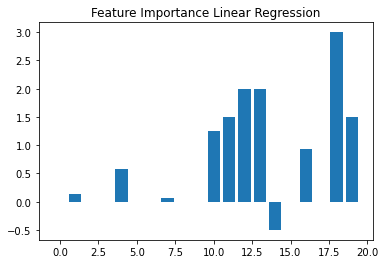

In [349]:
importance = linReg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance Linear Regression')
plt.savefig('Feature Importance Linear Regression')
plt.show()

# From the above outputs it is quite clear the Linear Regression model trained on the 2021-2022 season once again 100% accurately predicts the 2022-2023 season player performance because of the linear relationship between stats(predictors) and Fantasy points(response). A very much expected result.

# Decision Tree

In [350]:
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X2)

In [351]:
# MSPE Calculation
res = (dec_tree_pred - y2)**2
mspe = np.mean(res)
mspe

9.588183421516755

In [352]:
dec_tree.score(X2, y2)

0.9480835965372045

In [353]:
mean_absolute_error(y2,dec_tree_pred)

2.2270723104056436

In [354]:
r2_score(y2,dec_tree_pred)

0.9480835965372045

In [355]:
dec_tree_pred

array([ 8.  , 19.25, 20.25, ..., 23.  , 25.  , 31.5 ])

In [356]:
data2['Decision Tree Pred'] = dec_tree_pred

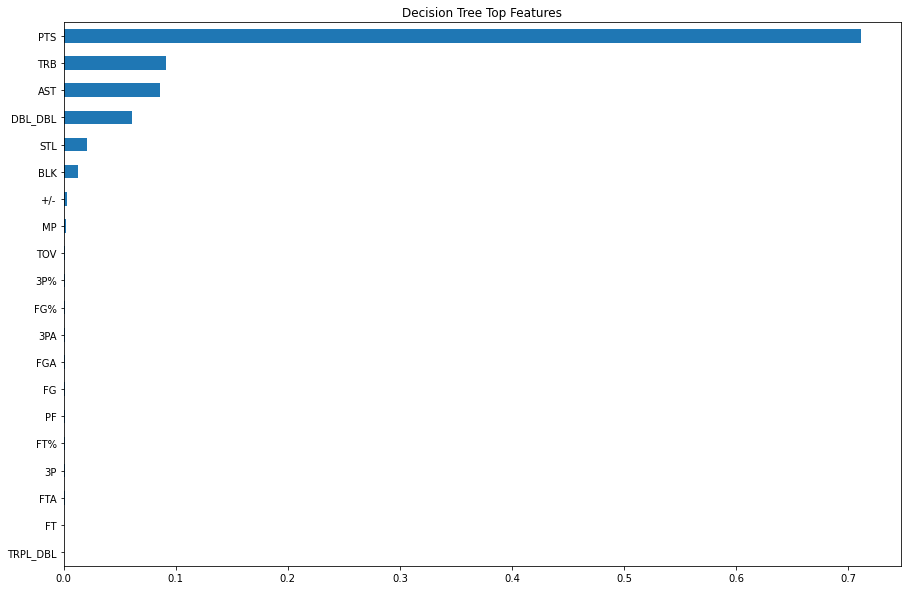

In [357]:
top_features = pd.Series(dec_tree.feature_importances_, index = _all).sort_values()
top_features.plot(kind = "barh", figsize=(15,10) ,title='Decision Tree Top Features')
plt.savefig('Decision Tree Top Features')

plt.show()

# KNN

In [358]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
knn_pred = knn.predict(X2)

In [359]:
# MSPE Calculation
res = (knn_pred - y2)**2
mspe = np.mean(res)
mspe

14.102510165589083

In [360]:
knn.score(X2, y2)

0.92364021677434

In [361]:
mean_absolute_error(y2,knn_pred)

2.8894767783656676

In [362]:
r2_score(y2,knn_pred)

0.92364021677434

In [363]:
knn_pred

array([ 9.16666667, 17.91666667, 22.91666667, ..., 23.08333333,
       27.5       , 26.        ])

In [364]:
data2['KNN Pred'] = knn_pred

# Random Forest

In [365]:
rf = RandomForestRegressor().fit(X_train, y_train)
rf_pred = rf.predict(X2)

In [366]:
# MSPE Calculation
res = (rf_pred - y2)**2
mspe = np.mean(res)
mspe

3.270553662367731

In [367]:
rf.score(X2, y2)

0.9822911832181714

In [368]:
mean_absolute_error(y2,rf_pred)

1.2317493386243386

In [369]:
r2_score(y2,rf_pred)

0.9822911832181714

In [370]:
rf_pred

array([ 7.86  , 17.9875, 21.43  , ..., 23.52  , 27.0925, 28.965 ])

In [371]:
data2['Random Forest Pred'] = rf_pred

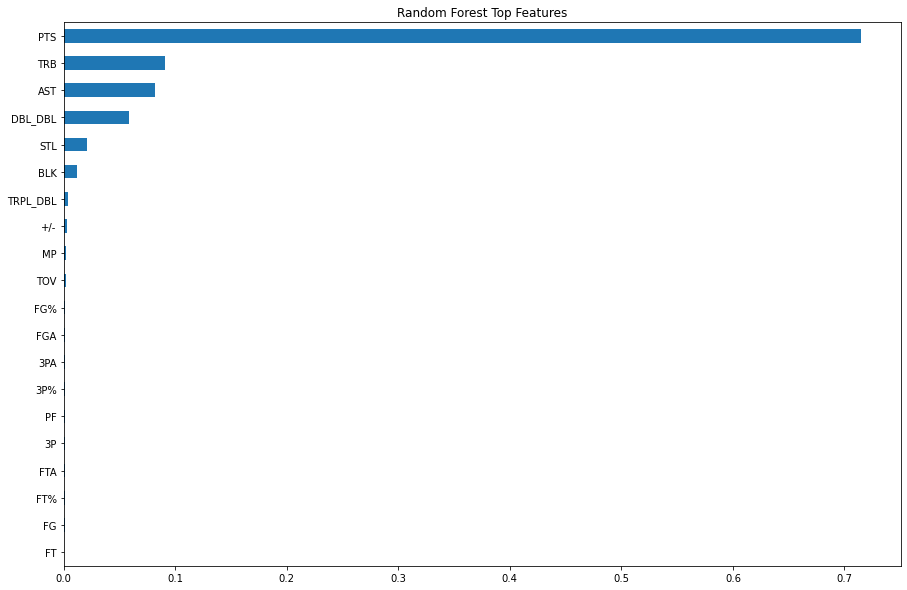

In [372]:
top_features = pd.Series(rf.feature_importances_, index = _all).sort_values()
top_features.plot(kind = "barh", figsize=(15,10) ,title='Random Forest Top Features')
plt.savefig('Random Forest Top Features')

plt.show()

# XGBoost

In [373]:
xgb = XGBRegressor().fit(X_train, y_train)

In [374]:
xgb_pred = xgb.predict(X2)

In [375]:
# MSPE Calculation
res = (xgb_pred - y2)**2
mspe = np.mean(res)
mspe

0.9727371073969484

In [376]:
xgb.score(X2, y2)

0.9947329947800619

In [377]:
mean_absolute_error(y2,xgb_pred)

0.660986582335492

In [378]:
r2_score(y2,xgb_pred)

0.9947329947800619

In [379]:
xgb_pred

array([ 7.6590614, 17.836246 , 20.744997 , ..., 22.91605  , 27.322697 ,
       27.981588 ], dtype=float32)

In [380]:
data2['XGBoost Pred'] = xgb_pred

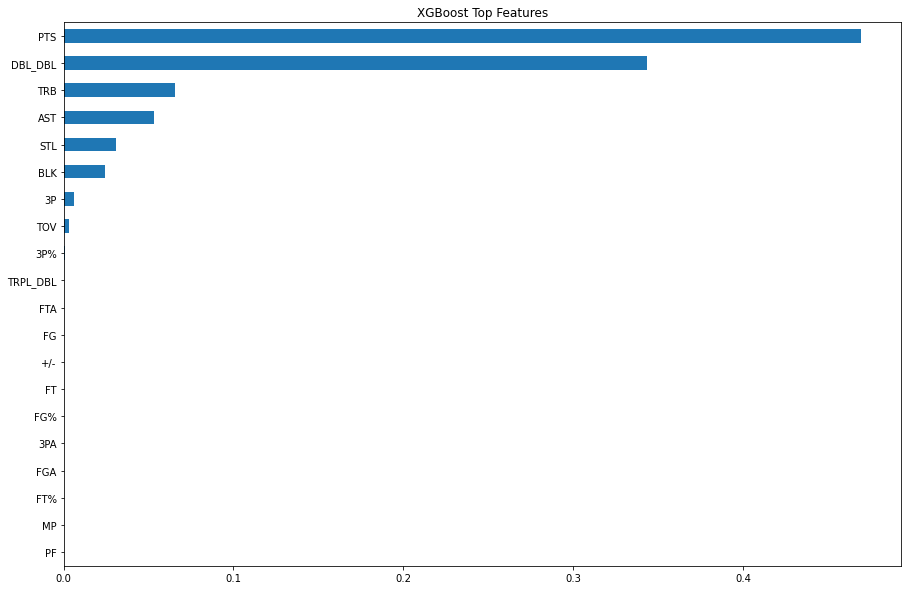

In [381]:
top_features = pd.Series(xgb.feature_importances_, index = _all).sort_values()
top_features.plot(kind = "barh", figsize=(15,10) ,title='XGBoost Top Features')
plt.savefig('XGBoost Top Features')

plt.show()

In [382]:
data2

Starters  MP    FG   FGA    FG%   3P  3PA    3P%    FT   FTA  \
7        AJ Griffin  15   1.0   6.0  0.167  1.0  6.0  0.167   0.0   0.0   
6        AJ Griffin  23   3.0   5.0  0.600  3.0  4.0  0.750   2.0   2.0   
6        AJ Griffin  24   4.0   8.0  0.500  2.0  4.0  0.500   2.0   2.0   
1        AJ Griffin  35   7.0  11.0  0.636  3.0  6.0  0.500   0.0   0.0   
6        AJ Griffin  20   3.0   9.0  0.333  0.0  4.0  0.000   0.0   0.0   
..              ...  ..   ...   ...    ...  ...  ...    ...   ...   ...   
2   Zion Williamson  35  11.0  18.0  0.611  0.0  1.0  0.000   1.0   1.0   
2   Zion Williamson  31   9.0  14.0  0.643  1.0  1.0  1.000  10.0  15.0   
3   Zion Williamson  27   7.0  11.0  0.636  0.0  0.0  0.000   2.0   4.0   
2   Zion Williamson  30   6.0  11.0  0.545  0.0  0.0  0.000   7.0   8.0   
0   Zion Williamson  30   6.0  12.0  0.500  0.0  0.0  0.000   2.0   2.0   

      FT%  TRB  AST  STL  BLK  TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  \
7   0.000  2.0  0.0  1.0  0.0  1.0  2.0   3.0  -6.0     False    False   
6   1.000  1.0  1.0  2.0  0.0  1.0  2.0  11.0  -2.0     False    False   
6   1.000  3.0  2.0  1.0  0.0  1.0  0.0  12.0   3.0     False    False   
1   0.000  2.0  1.0  3.0  0.0  2.0  3.0  17.0  -8.0     False    False   
6   0.000  3.0  1.0  1.0  0.0  2.0  1.0   6.0 -21.0     False    False   
..    ...  ...  ...  ...  ...  ...  ...   ...   ...       ...      ...   
2   1.000  8.0  8.0  1.0  3.0  4.0  3.0  23.0  19.0     False    False   
2   0.667  6.0  3.0  1.0  0.0  3.0  4.0  29.0 -12.0     False    False   
3   0.500  3.0  1.0  1.0  0.0  2.0  2.0  16.0   9.0     False    False   
2   0.875  5.0  1.0  0.0  0.0  1.0  3.0  19.0   3.0     False    False   
0   1.000  5.0  4.0  1.0  0.0  1.0  3.0  14.0 -32.0     False    False   

    Fantasy_PTS  Linear Regression Pred  Decision Tree Pred   KNN Pred  \
7          7.50                    7.50                8.00   9.166667   
6         18.75                   18.75               19.25  17.916667   
6         21.25                   21.25               20.25  22.916667   
1         27.50                   27.50               31.00  26.750000   
6         12.25                   12.25               13.25  11.083333   
..          ...                     ...                 ...        ...   
2         51.00                   51.00               49.75  47.666667   
2         42.00                   42.00               45.00  41.750000   
3         22.25                   22.25               23.00  23.083333   
2         26.25                   26.25               25.00  27.500000   
0         27.75                   27.75               31.50  26.000000   

    Random Forest Pred  XGBoost Pred  
7               7.8600      7.659061  
6              17.9875     17.836246  
6              21.4300     20.744997  
1              28.6875     27.073166  
6              12.6750     11.200709  
..                 ...           ...  
2              47.8425     52.006901  
2              43.0575     44.309151  
3              23.5200     22.916050  
2              27.0925     27.322697  
0              28.9650     27.981588  

[4536 rows x 27 columns]

In [383]:
### CONVERT TO CSV
data2.to_csv("2023_with_predictions.csv")

# Now we're going to plot actual fantasy points and the predictions of each model for 3 players for the 2022-2023 season: Nikola Jokic, Stephen Curry, Luka Doncic 

In [384]:
jokic = data2[data2.Starters == 'Nikola Jokić']
jokic['index1'] = list(range(1,19))
jokic

Starters  MP    FG   FGA    FG%   3P  3PA    3P%    FT   FTA    FT%  \
0  Nikola Jokić  36  12.0  16.0  0.750  0.0  0.0  0.000   7.0  11.0  0.636   
2  Nikola Jokić  26   9.0  10.0  0.900  1.0  1.0  1.000   2.0   2.0  1.000   
0  Nikola Jokić  34   7.0  13.0  0.538  1.0  2.0  0.500  11.0  11.0  1.000   
1  Nikola Jokić  32   7.0  13.0  0.538  0.0  1.0  0.000   5.0   7.0  0.714   
1  Nikola Jokić  27   4.0   4.0  1.000  0.0  0.0  0.000   0.0   0.0  0.000   
2  Nikola Jokić  33  12.0  17.0  0.706  1.0  3.0  0.333   2.0   2.0  1.000   
2  Nikola Jokić  26   3.0   4.0  0.750  0.0  0.0  0.000   3.0   3.0  1.000   
3  Nikola Jokić  29  12.0  20.0  0.600  2.0  4.0  0.500   3.0   4.0  0.750   
4  Nikola Jokić  20  10.0  20.0  0.500  1.0  3.0  0.333   3.0   3.0  1.000   
0  Nikola Jokić  38   6.0  10.0  0.600  1.0  1.0  1.000   6.0   9.0  0.667   
3  Nikola Jokić  27   7.0   9.0  0.778  2.0  3.0  0.667   1.0   1.0  1.000   
0  Nikola Jokić  33  11.0  20.0  0.550  0.0  1.0  0.000   4.0   5.0  0.800   
0  Nikola Jokić  35   6.0   9.0  0.667  0.0  0.0  0.000   3.0   3.0  1.000   
1  Nikola Jokić  43  11.0  15.0  0.733  1.0  3.0  0.333  16.0  18.0  0.889   
0  Nikola Jokić  34  12.0  17.0  0.706  0.0  4.0  0.000   7.0   7.0  1.000   
0  Nikola Jokić  35   8.0  16.0  0.500  1.0  5.0  0.200   6.0   7.0  0.857   
2  Nikola Jokić  25   3.0  10.0  0.300  0.0  4.0  0.000   6.0   8.0  0.750   
1  Nikola Jokić  27  11.0  17.0  0.647  1.0  2.0  0.500   9.0  10.0  0.900   

    TRB   AST  STL  BLK   TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  \
0   9.0  10.0  1.0  1.0   5.0  3.0  31.0  13.0     False     True   
2   6.0  10.0  2.0  0.0   4.0  2.0  21.0  20.0     False     True   
0  12.0  10.0  0.0  0.0   5.0  4.0  26.0  -3.0      True    False   
1  13.0   6.0  2.0  1.0   2.0  3.0  19.0  19.0     False     True   
1   6.0  14.0  3.0  0.0   2.0  0.0   8.0  29.0     False    False   
2   4.0   6.0  3.0  0.0   3.0  4.0  27.0  -5.0     False    False   
2   9.0   9.0  0.0  0.0   1.0  5.0   9.0 -10.0     False    False   
3   8.0   3.0  0.0  0.0   2.0  4.0  29.0 -14.0     False    False   
4   4.0   6.0  2.0  1.0   1.0  5.0  24.0  11.0     False    False   
0  16.0  13.0  1.0  1.0   3.0  2.0  19.0  18.0      True    False   
3   9.0  12.0  1.0  1.0   4.0  5.0  17.0  10.0     False     True   
0   8.0  10.0  2.0  3.0   4.0  2.0  26.0  15.0     False     True   
0  13.0  14.0  1.0  0.0  10.0  3.0  15.0  15.0      True    False   
1  10.0   9.0  0.0  0.0   4.0  5.0  39.0  11.0     False     True   
0  13.0   9.0  4.0  0.0   3.0  3.0  31.0  28.0     False     True   
0  14.0   6.0  0.0  2.0   2.0  0.0  23.0   0.0     False     True   
2  10.0   6.0  1.0  1.0   1.0  1.0  12.0   8.0     False     True   
1  12.0   8.0  0.0  0.0   3.0  2.0  32.0   8.0     False     True   

   Fantasy_PTS  Linear Regression Pred  Decision Tree Pred   KNN Pred  \
0        60.25                   60.25               67.50  59.416667   
2        47.50                   47.50               47.00  37.666667   
0        57.00                   57.00               58.25  55.916667   
1        50.75                   50.75               46.00  43.250000   
1        41.50                   41.50               40.50  39.666667   
2        46.00                   46.00               49.25  41.833333   
2        33.25                   33.25               49.50  28.750000   
3        43.50                   43.50               41.00  41.500000   
4        44.00                   44.00               41.50  29.000000   
0        64.50                   64.50               65.25  49.833333   
3        50.75                   50.75               43.25  44.333333   
0        60.50                   60.50               57.25  49.583333   
0        52.25                   52.25               54.25  49.416667   
1        65.00                   65.00               69.50  67.333333   
0        68.75                   68.75               67.75  56.833333   
0        54.50                   54.50      

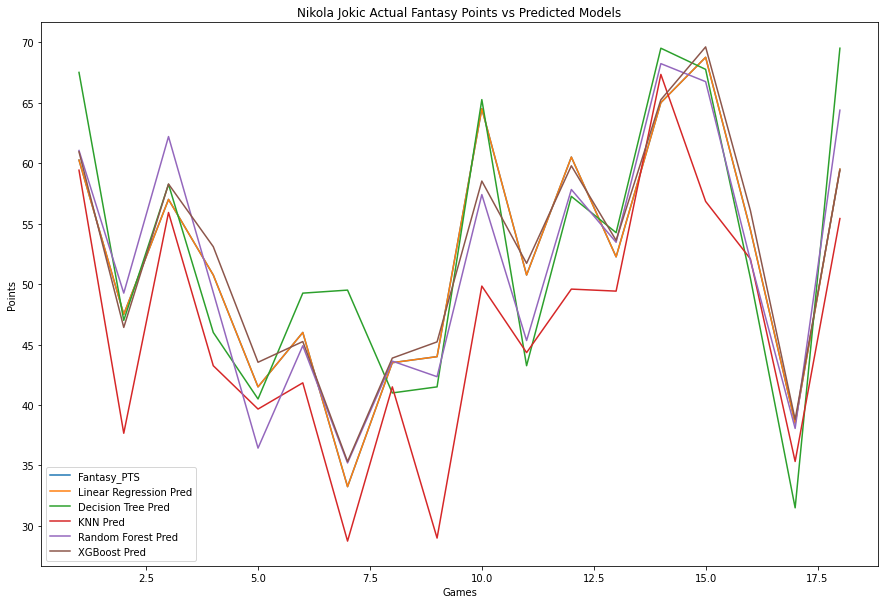

In [385]:
jokic.reset_index().plot(x ='index1', y = ['Fantasy_PTS', 'Linear Regression Pred', 'Decision Tree Pred', 'KNN Pred', 'Random Forest Pred', 'XGBoost Pred'], kind='line', figsize=(15,10))
plt.ylabel('Points')
plt.xlabel('Games')
plt.title("Nikola Jokic Actual Fantasy Points vs Predicted Models")
plt.savefig("Nikola Jokic Actual Fantasy Points vs Predicted Models")
plt.show()

In [386]:
curry = data2[data2.Starters == 'Stephen Curry']
curry['index1'] = list(range(1,21))
curry

Starters  MP    FG   FGA    FG%   3P   3PA    3P%   FT  FTA    FT%  \
2  Stephen Curry  31   9.0  20.0  0.450  4.0  10.0  0.400  0.0  0.0  0.000   
0  Stephen Curry  33   9.0  19.0  0.474  5.0  13.0  0.385  1.0  3.0  0.333   
1  Stephen Curry  32   7.0  17.0  0.412  4.0  11.0  0.364  7.0  7.0  1.000   
0  Stephen Curry  35  13.0  23.0  0.565  6.0  13.0  0.462  1.0  1.0  1.000   
1  Stephen Curry  34  10.0  24.0  0.417  4.0  14.0  0.286  8.0  9.0  0.889   
0  Stephen Curry  38  13.0  22.0  0.591  8.0  15.0  0.533  5.0  5.0  1.000   
1  Stephen Curry  34  15.0  23.0  0.652  6.0  11.0  0.545  4.0  6.0  0.667   
0  Stephen Curry  36  17.0  28.0  0.607  7.0  11.0  0.636  9.0  9.0  1.000   
1  Stephen Curry  29   7.0  17.0  0.412  4.0   9.0  0.444  3.0  5.0  0.600   
0  Stephen Curry  32  10.0  22.0  0.455  4.0  13.0  0.308  9.0  9.0  1.000   
1  Stephen Curry  35  10.0  22.0  0.455  5.0  11.0  0.455  9.0  9.0  1.000   
0  Stephen Curry  36  11.0  20.0  0.550  7.0  14.0  0.500  4.0  5.0  0.800   
0  Stephen Curry  37  11.0  24.0  0.458  5.0  14.0  0.357  5.0  6.0  0.833   
1  Stephen Curry  31  11.0  22.0  0.500  7.0  12.0  0.583  4.0  4.0  1.000   
1  Stephen Curry  38  10.0  22.0  0.455  3.0  13.0  0.231  8.0  8.0  1.000   
2  Stephen Curry  37  17.0  24.0  0.708  7.0  12.0  0.583  6.0  7.0  0.857   
1  Stephen Curry  27   5.0  11.0  0.455  3.0   7.0  0.429  3.0  3.0  1.000   
0  Stephen Curry  36   9.0  17.0  0.529  3.0   9.0  0.333  6.0  6.0  1.000   
0  Stephen Curry  36  13.0  22.0  0.591  7.0  14.0  0.500  0.0  0.0  0.000   
1  Stephen Curry  34   7.0  14.0  0.500  4.0  10.0  0.400  5.0  5.0  1.000   

    TRB   AST  STL  BLK  TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  Fantasy_PTS  \
2   6.0   9.0  0.0  0.0  1.0  0.0  22.0  18.0     False    False        44.50   
0   6.0  10.0  2.0  0.0  5.0  2.0  24.0  18.0     False     True        52.00   
1  11.0   8.0  1.0  0.0  7.0  1.0  25.0  22.0     False     True        52.75   
0   5.0   4.0  2.0  0.0  5.0  4.0  33.0  19.0     False    False        49.75   
1   6.0   3.0  2.0  0.0  1.0  1.0  32.0 -12.0     False    False        49.50   
0   3.0   9.0  0.0  0.0  5.0  3.0  39.0   4.0     False    False        57.75   
1   4.0   5.0  1.0  0.0  2.0  4.0  40.0   7.0     False    False        56.50   
0   9.0   6.0  0.0  1.0  3.0  2.0  50.0 -14.0     False    False        74.25   
1   7.0   8.0  1.0  0.0  1.0  1.0  21.0 -17.0     False    False        45.25   
0   6.0   7.0  4.0  1.0  4.0  1.0  33.0  20.0     False    False        61.00   
1   5.0   4.0  0.0  0.0  3.0  2.0  34.0   9.0     False    False        47.25   
0   6.0  15.0  3.0  2.0  1.0  3.0  33.0  22.0     False     True        77.50   
0   5.0   5.0  0.0  0.0  4.0  4.0  32.0 -12.0     False    False        46.25   
1   5.0   2.0  1.0  0.0  2.0  3.0  33.0  19.0     False    False        46.75   
1  11.0   6.0  1.0  0.0  2.0  5.0  31.0  -6.0     False     True        57.75   
2   8.0   8.0  0.0  0.0  0.0  2.0  47.0  20.0     False    False        72.50   
1   5.0   5.0  1.0  0.0  1.0  1.0  16.0  17.0     False    False        32.75   
0   6.0   4.0  1.0  0.0  4.0  0.0  27.0   0.0     False    False        42.00   
0   7.0   9.0  1.0  0.0  3.0  0.0  33.0  13.0     False    False        59.25   
1  13.0  13.0  1.0  0.0  5.0  3.0  23.0   3.0      True    False        63.25   

   Linear Regression Pred  Decision Tree Pred   KNN Pred  Random Forest Pred  \
2                   44.50               45.50  44.083333             44.4625   
0                   52.00               52.00  48.166667             51.9250   
1                   52.75               54.00  49.166667             53.3000   
0                   49.75               62.25  51.250000             50.6950   
1                   49.50               58.00  45.500000             47.9875   
0                   57.75               60.75  59.500000             59.9475   
1                   56.50               56.50  55.750000             56.0500   
0                   74.25  

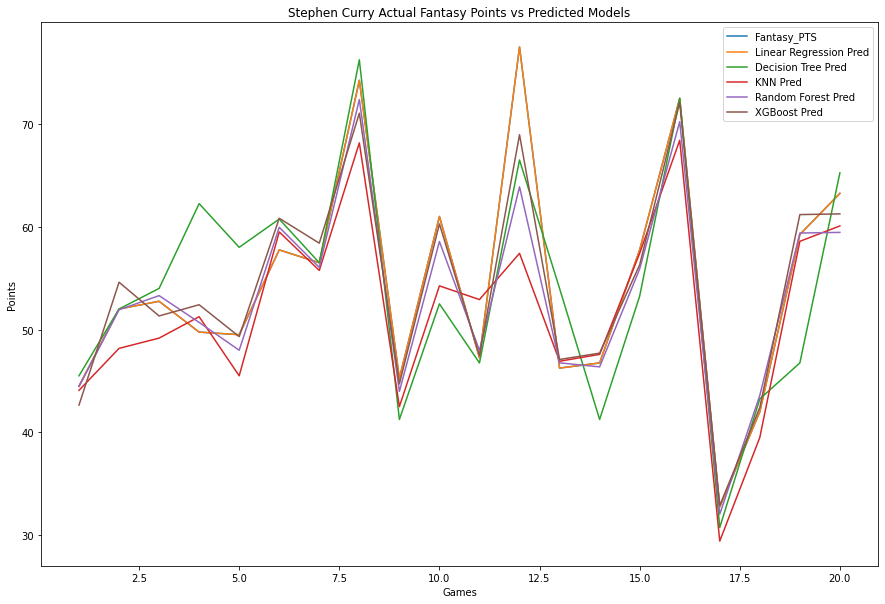

In [387]:
curry.reset_index().plot(x ='index1', y = ['Fantasy_PTS', 'Linear Regression Pred', 'Decision Tree Pred', 'KNN Pred', 'Random Forest Pred', 'XGBoost Pred'], kind='line', figsize=(15,10))
plt.ylabel('Points')
plt.xlabel('Games')
plt.title("Stephen Curry Actual Fantasy Points vs Predicted Models")
plt.savefig("Stephen Curry Actual Fantasy Points vs Predicted Models")
plt.show()

In [388]:
luka = data2[data2.Starters == 'Luka Dončić']
luka['index1'] = list(range(1,20))
luka

Starters  MP    FG   FGA    FG%   3P   3PA    3P%    FT   FTA    FT%  \
1  Luka Dončić  35   9.0  29.0  0.310  2.0  11.0  0.182   4.0   7.0  0.571   
0  Luka Dončić  42   8.0  15.0  0.533  2.0   4.0  0.500   6.0   9.0  0.667   
0  Luka Dončić  38  11.0  22.0  0.500  5.0   9.0  0.556   9.0  12.0  0.750   
1  Luka Dončić  36  16.0  30.0  0.533  2.0  13.0  0.154   3.0   5.0  0.600   
0  Luka Dončić  39  14.0  27.0  0.519  4.0   9.0  0.444   9.0  15.0  0.600   
1  Luka Dončić  39  11.0  22.0  0.500  2.0   5.0  0.400  11.0  11.0  1.000   
0  Luka Dončić  37  13.0  22.0  0.591  1.0   5.0  0.200  15.0  18.0  0.833   
1  Luka Dončić  35  10.0  20.0  0.500  3.0   7.0  0.429   4.0   9.0  0.444   
1  Luka Dončić  40  14.0  28.0  0.500  2.0   6.0  0.333  11.0  13.0  0.846   
0  Luka Dončić  39   8.0  21.0  0.381  3.0   8.0  0.375   3.0   9.0  0.333   
0  Luka Dončić  29  12.0  23.0  0.522  4.0   9.0  0.444   4.0   5.0  0.800   
1  Luka Dončić  36  10.0  15.0  0.667  3.0   6.0  0.500  12.0  14.0  0.857   
0  Luka Dončić  40   8.0  23.0  0.348  0.0   6.0  0.000  15.0  19.0  0.789   
0  Luka Dončić  36  17.0  26.0  0.654  2.0   9.0  0.222   8.0  14.0  0.571   
1  Luka Dončić  36  10.0  23.0  0.435  2.0  10.0  0.200  13.0  13.0  1.000   
0  Luka Dončić  35  12.0  20.0  0.600  2.0   6.0  0.333   7.0  10.0  0.700   
0  Luka Dončić  39  17.0  28.0  0.607  3.0   8.0  0.375   5.0   9.0  0.556   
0  Luka Dončić  35   7.0  16.0  0.438  2.0   8.0  0.250   6.0  10.0  0.600   
0  Luka Dončić  34  11.0  22.0  0.500  2.0   7.0  0.286   9.0  11.0  0.818   

    TRB   AST  STL  BLK  TOV   PF   PTS   +/-  TRPL_DBL  DBL_DBL  Fantasy_PTS  \
1   6.0   6.0  3.0  2.0  0.0  3.0  24.0  -3.0     False    False        51.50   
0   7.0   9.0  2.0  1.0  4.0  2.0  24.0   2.0     False    False        51.25   
0   6.0   6.0  2.0  1.0  5.0  5.0  36.0   1.0     False    False        58.50   
1  11.0   7.0  2.0  1.0  3.0  3.0  37.0   6.0     False     True        68.25   
0  12.0  12.0  4.0  1.0  5.0  3.0  41.0  22.0      True    False        86.50   
1  11.0   5.0  3.0  0.0  3.0  3.0  35.0   4.0     False     True        63.25   
0  13.0  10.0  2.0  1.0  2.0  3.0  42.0   6.0      True    False        81.75   
1   5.0  12.0  0.0  0.0  6.0  2.0  27.0 -10.0     False     True        51.25   
1  11.0  14.0  3.0  0.0  5.0  2.0  41.0  20.0      True    False        83.25   
0   9.0   6.0  2.0  0.0  5.0  2.0  22.0  -6.0     False    False        45.25   
0   7.0  10.0  2.0  2.0  3.0  2.0  32.0  31.0     False     True        65.75   
1   8.0   6.0  3.0  1.0  4.0  4.0  35.0   8.0     False    False        61.50   
0  16.0  10.0  1.0  0.0  3.0  6.0  31.0 -25.0      True    False        69.50   
0   3.0   5.0  1.0  0.0  0.0  3.0  44.0  13.0     False    False        58.25   
1   9.0   6.0  1.0  0.0  4.0  3.0  35.0 -16.0     False    False        56.25   
0   5.0  11.0  2.0  0.0  5.0  3.0  33.0  -3.0     False     True        59.75   
0   8.0   9.0  0.0  0.0  5.0  4.0  42.0 -13.0     False    False        64.50   
0   9.0   8.0  1.0  0.0  4.0  2.0  22.0   1.0     False    False        46.25   
0  12.0  11.0  1.0  0.0  2.0  1.0  33.0  25.0      True    False        69.50   

   Linear Regression Pred  Decision Tree Pred   KNN Pred  Random Forest Pred  \
1                   51.50               46.25  49.166667             47.0825   
0                   51.25               50.75  50.333333             49.9925   
0                   58.50               59.75  55.000000             56.3875   
1                   68.25               62.25  61.000000             66.6475   
0                   86.50               93.50  79.083333             75.8950   
1                   63.25               61.75  63.166667             61.0475   
0                   81.75               93.50  72.333333             74.8675   
1                   51.25               51.50  49.500000             54.9375   
1                   83.25               93.50  79.083333             74.5250   
0                   45.2

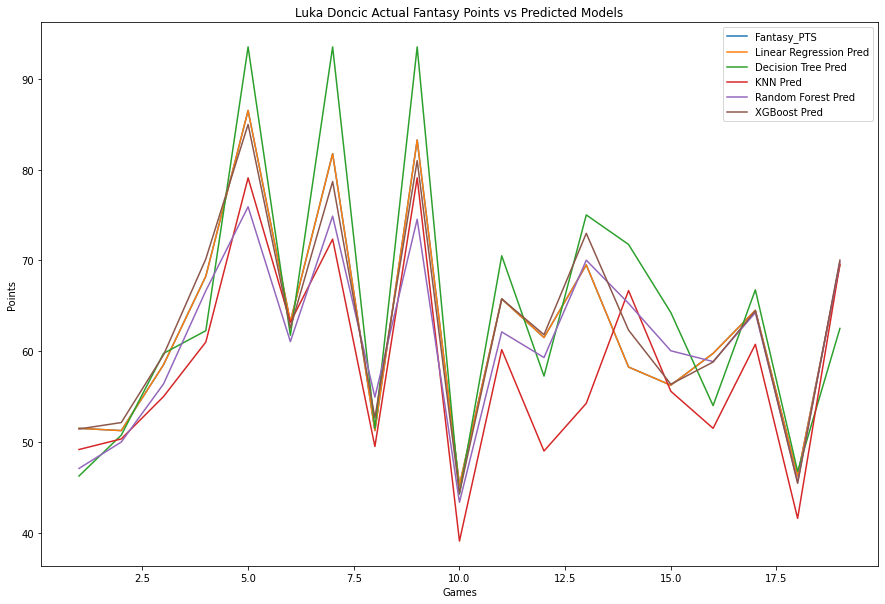

In [389]:
luka.reset_index().plot(x ='index1', y = ['Fantasy_PTS', 'Linear Regression Pred', 'Decision Tree Pred', 'KNN Pred', 'Random Forest Pred', 'XGBoost Pred'], kind='line', figsize=(15,10))
plt.ylabel('Points')
plt.xlabel('Games')
plt.title("Luka Doncic Actual Fantasy Points vs Predicted Models")
plt.savefig("Luka Doncic Actual Fantasy Points vs Predicted Models")
plt.show()

In [390]:
pd.__version__

'1.3.5'

In [391]:
np.__version__

'1.21.5'

In [392]:
sklearn.__version__

'1.0.2'